# ObsID : 0945020133, SRCNUM : 3, Instru : EMOS


ObsID0945020133_SRCNUM3_EMOS1_t10_lccorr.lc
Filename: ObsID0945020133_SRCNUM3_EMOS1_t10_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     77   1575R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


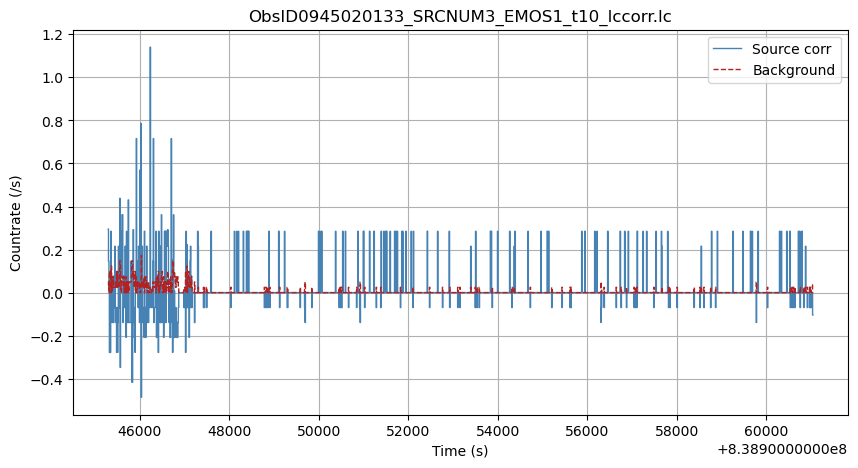

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob

import stingray as st
from stingray import Lightcurve, AveragedPowerspectrum

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [10,5]

def lightcurve(file):
    hdul = fits.open(file)
    print()
    print(color.BOLD +file+ color.END)
    hdul.info()
    
    rate_data = hdul[1].columns
    print()
    print(rate_data)
        
    time = hdul[1].data.field('TIME')
    rate = hdul[1].data.field('RATE')
    error = hdul[1].data.field('ERROR')
    backrate = hdul[1].data.field('BACKV')
    
    lcs = []
    backlcs = []
    gtis = []
    for i in hdul[2].data:
        gtis.append([i[0],i[1]])
    lcs.append(Lightcurve(time, rate, error, gti=gtis, input_counts=False))
    backlcs.append(Lightcurve(time, backrate, error, gti=gtis, input_counts=False))

    for i in range(len(lcs)):
        plt.xlabel('Time (s)')
        plt.ylabel('Countrate (/s)')
        plt.plot(lcs[i].time, lcs[i].countrate, color='steelblue', lw=1, ds='steps-mid', label='Source corr')
        plt.plot(backlcs[i].time, backlcs[i].countrate, color='firebrick',lw=1, ls='--', ds='steps-mid', label='Background')
        plt.title(f'{file}')
        plt.legend(loc='upper right')
        plt.grid()
        for j in range(len(lcs[i].gti)-1):
            plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='purple',alpha=0.25)
        plt.show()

lightcurve(glob.glob('ObsID*_SRCNUM*_EMOS1_t10_lccorr.lc')[0])

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob

import stingray as st
from stingray import Lightcurve

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [10, 5]

def lightcurve(files):
    all_times = []
    all_rates = []
    all_errors = []
    all_backrates = []
    all_gtis = []

    # Parcours des fichiers pour extraire les données
    for file in files:
        hdul = fits.open(file)
        print()
        print(color.BOLD + file + color.END)
        hdul.info()

        time = hdul[1].data.field('TIME')
        rate = hdul[1].data.field('RATE')
        error = hdul[1].data.field('ERROR')
        backrate = hdul[1].data.field('BACKV')
        
        gtis = []
        for i in hdul[2].data:
            gtis.append([i[0], i[1]])

        # Ajoute les données de chaque fichier
        all_times.extend(time)
        all_rates.extend(rate)
        all_errors.extend(error)
        all_backrates.extend(backrate)
        all_gtis.extend(gtis)

    # Créer une courbe de lumière combinée
    combined_lc = Lightcurve(
        np.array(all_times), np.array(all_rates), np.array(all_errors), gti=all_gtis, input_counts=False)
    
    # Créer une courbe de fond combinée
    combined_backlc = Lightcurve(
        np.array(all_times), np.array(all_backrates), np.array(all_errors), gti=all_gtis, input_counts=False)

    # Tracer la courbe de lumière combinée
    plt.xlabel('Time (s)')
    plt.ylabel('Countrate (/s)')
    plt.plot(combined_lc.time, combined_lc.countrate, color='steelblue', lw=1, ds='steps-mid', label='Source corr')
    plt.plot(combined_backlc.time, combined_backlc.countrate, color='firebrick', lw=1, ls='--', ds='steps-mid', label='Background')
    
    # Afficher les GTIs
    for j in range(len(combined_lc.gti)-1):
        plt.axvspan(combined_lc.gti[j][1], combined_lc.gti[j+1][0], color='purple', alpha=0.25)

    plt.title('Combined Lightcurve')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

# Appel de la fonction avec les deux fichiers
files = [
    glob.glob('ObsID*_SRCNUM*_EMOS1_t10_lccorr.lc')[0],
    glob.glob('ObsID*_SRCNUM*_EMOS2_t10_lccorr.lc')[0]
]

lightcurve(files)



ObsID0945020133_SRCNUM3_EMOS1_t10_lccorr.lc
Filename: ObsID0945020133_SRCNUM3_EMOS1_t10_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     77   1575R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ObsID0945020133_SRCNUM3_EMOS2_t10_lccorr.lc
Filename: ObsID0945020133_SRCNUM3_EMOS2_t10_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     79   1575R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   2R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   2R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   


ValueError: This GTI has overlaps.

## Time bin size = 10s


ObsID0945020133_SRCNUM3_EMOS1_t10_lccorr.lc
Filename: ObsID0945020133_SRCNUM3_EMOS1_t10_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     77   1575R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


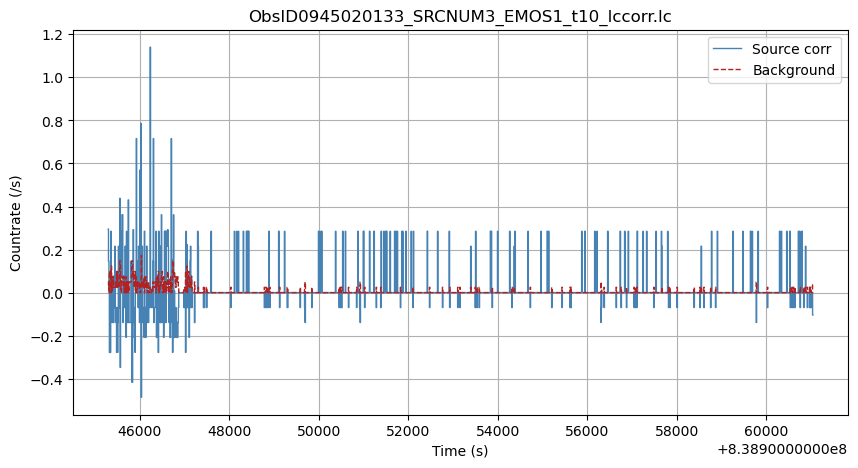


ObsID0945020133_SRCNUM3_EMOS2_t10_lccorr.lc
Filename: ObsID0945020133_SRCNUM3_EMOS2_t10_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     79   1575R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   2R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   2R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


/home/celia/.local/lib/python3.10/site-packages/stingray/lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: RuntimeWarning: invalid value encountered in cast
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: RuntimeWarning: invalid value encountered in cast
  return np.asarray(x, float)


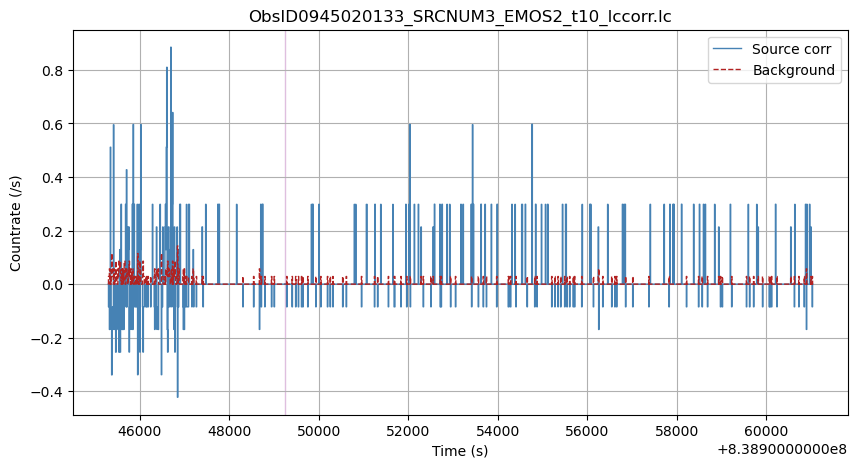

"\nplt.xlabel('Time (s)')\nplt.ylabel('Countrate (/s)')\nplt.plot(lcs_combined.time, lcs_combined.countrate, color='steelblue', lw=1, ds='steps-mid', label='Source corr')\nplt.plot(backlcs_combined.time, backlcs_combined.countrate, color='firebrick',lw=1, ls='--', ds='steps-mid', label='Background')\nplt.legend(loc='upper right')\nplt.grid()\n\nfor j in range(len(lcs[i].gti)-1):\n    plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='purple',alpha=0.25)\n\nplt.show()\n"

In [6]:
lcs1, backlcs1 = lightcurve(glob.glob('ObsID*_SRCNUM*_EMOS1_t10_lccorr.lc')[0])
lcs2, backlcs2 = lightcurve(glob.glob('ObsID*_SRCNUM*_EMOS2_t10_lccorr.lc')[0])
lcs_combined = lcs1 + lcs2
backlcs_combined = backlcs1 + backlcs1
"""
plt.xlabel('Time (s)')
plt.ylabel('Countrate (/s)')
plt.plot(lcs_combined.time, lcs_combined.countrate, color='steelblue', lw=1, ds='steps-mid', label='Source corr')
plt.plot(backlcs_combined.time, backlcs_combined.countrate, color='firebrick',lw=1, ls='--', ds='steps-mid', label='Background')
plt.legend(loc='upper right')
plt.grid()

for j in range(len(lcs[i].gti)-1):
    plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='purple',alpha=0.25)

plt.show()
"""

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import stingray as st
from stingray import Lightcurve

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

plt.rcParams['figure.figsize'] = [10, 5]

def read_lightcurve(file):
    hdul = fits.open(file)
    time = hdul[1].data.field('TIME')
    rate = hdul[1].data.field('RATE')
    error = hdul[1].data.field('ERROR')
    backrate = hdul[1].data.field('BACKV')
    gtis = [[g[0], g[1]] for g in hdul[2].data]
    
    return Lightcurve(time, rate, error, gti=gtis, input_counts=False), Lightcurve(time, backrate, error, gti=gtis, input_counts=False)

def combine_lightcurves(files):
    lightcurves = []
    backlightcurves = []
    
    for file in files:
        lc, backlc = read_lightcurve(file)
        lightcurves.append(lc)
        backlightcurves.append(backlc)
    
    combined_lc = lightcurves[0]
    combined_backlc = backlightcurves[0]
    
    for lc, backlc in zip(lightcurves[1:], backlightcurves[1:]):
        combined_lc = combined_lc + lc
        combined_backlc = combined_backlc + backlc
    
    return combined_lc, combined_backlc

def plot_lightcurve(lc, backlc, title):
    plt.xlabel('Time (s)')
    plt.ylabel('Countrate (/s)')
    plt.plot(lc.time, lc.countrate, color='steelblue', lw=1, ds='steps-mid', label='Source corr')
    plt.plot(backlc.time, backlc.countrate, color='firebrick', lw=1, ls='--', ds='steps-mid', label='Background')
    plt.title(title)
    plt.legend(loc='upper right')
    plt.grid()
    
    for j in range(len(lc.gti)-1):
        plt.axvspan(lc.gti[j][1], lc.gti[j+1][0], color='purple', alpha=0.25)
    
    plt.show()

files = [glob.glob('ObsID*_SRCNUM*_EMOS1_t10_lccorr.lc')[0], glob.glob('ObsID*_SRCNUM*_EMOS2_t10_lccorr.lc')[0]]
combined_lc, combined_backlc = combine_lightcurves(files)
plot_lightcurve(combined_lc, combined_backlc, 'Combined Lightcurve')

C:\Users\acer\anaconda3\Lib\site-packages\stingray\lightcurve.py:585: UserWarning: The good time intervals in the two time series are different. Data outside the common GTIs will be discarded.
  warnings.warn(


ValueError: GTI-filtered time arrays of both light curves must be of same dimension and equal.

## Time bin size = 50s


ObsID0945020133_SRCNUM3_EMOS2_t50_lccorr.lc
Filename: ObsID0945020133_SRCNUM3_EMOS2_t50_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     79   32R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


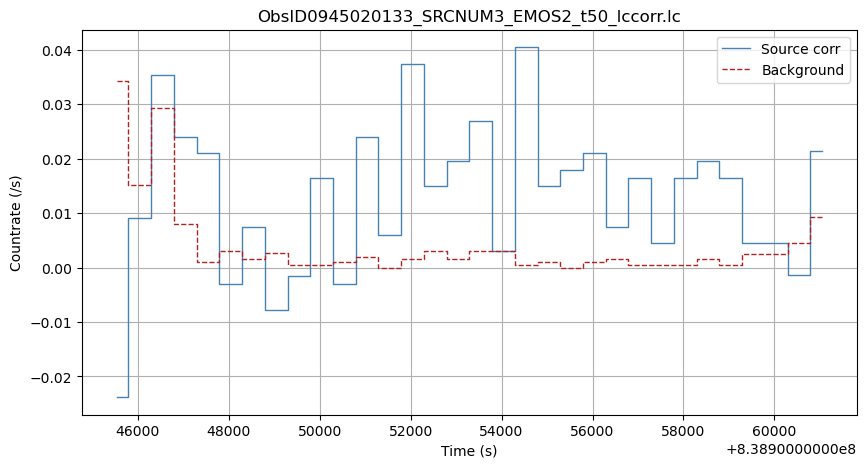

In [4]:
lightcurve(glob.glob('ObsID*_SRCNUM*_E*_t50_lccorr.lc')[0])

## Time bin size = 200s


ObsID0945020133_SRCNUM3_EMOS2_t200_lccorr.lc
Filename: ObsID0945020133_SRCNUM3_EMOS2_t200_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     79   32R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


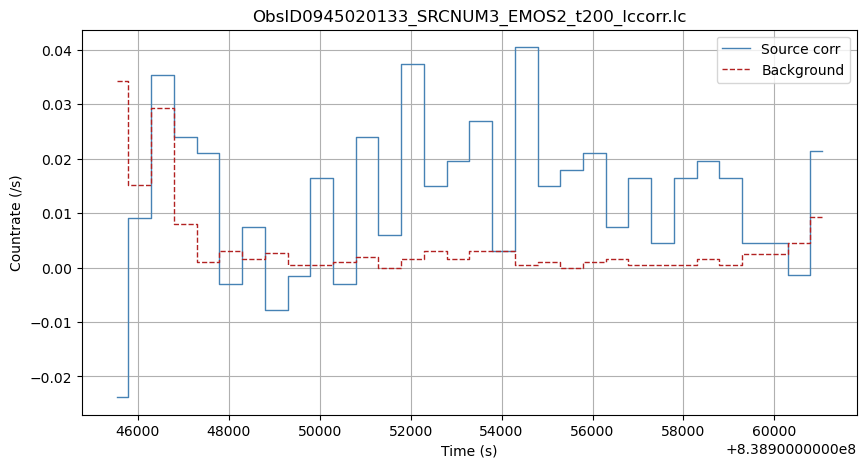

In [5]:
lightcurve(glob.glob('ObsID*_SRCNUM*_E*_t200_lccorr.lc')[0])

## Time bin size = 500s


ObsID0945020133_SRCNUM3_EMOS2_t500_lccorr.lc
Filename: ObsID0945020133_SRCNUM3_EMOS2_t500_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     79   32R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


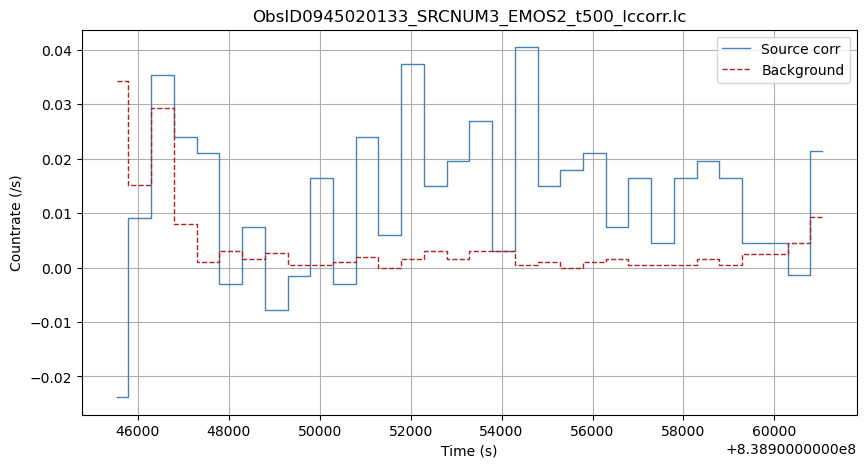

In [6]:
lightcurve(glob.glob('ObsID*_SRCNUM*_E*_t500_lccorr.lc')[0])